In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline

%matplotlib inline

In [12]:
%run 'functions.ipynb'

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/PULK4N/Data-analysis/master/Urban_sounds/urban_sound.csv')

In [14]:
len(df['class'].unique())

10

In [15]:
X = copy.copy(df.drop('class',axis=1))
y = copy.copy(df['class'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)

In [17]:
grouped_counter = y.groupby(by=y).count()
grouped_counter

class
air_conditioner     600
car_horn            306
children_playing    600
dog_bark            600
drilling            600
engine_idling       624
gun_shot            230
jackhammer          668
siren               607
street_music        600
Name: class, dtype: int64

In [76]:
pipe_nn = Pipeline(steps=[('scaler',StandardScaler()),('mlp', MLPClassifier())]) 

In [73]:
nn_layers = [(32,16,16), (128,64,32),(128,64),(64)]
nn_learning_rate_init = [0.1, 0.01, 0.001, 0.0001, 0.00001]
nn_max_iter = [50,100,200,300,500,-1]
nn_learning_rates = ['constant', 'invscaling', 'adaptive']
nn_activation = ['relu', 'tanh']
nn_batch_size = [256]

hyperparameters = {'mlp__hidden_layer_sizes':nn_layers, 
                        'mlp__learning_rate_init':nn_learning_rate_init, 'mlp__max_iter':nn_max_iter, 
                        'mlp__learning_rate':nn_learning_rates, 'mlp__activation':nn_activation,
                        'mlp__batch_size':nn_batch_size}
hyperparameters

{'mlp__hidden_layer_sizes': [(32, 16, 16), (128, 64, 32), (128, 64), 64],
 'mlp__learning_rate_init': [0.1, 0.01, 0.001, 0.0001, 1e-05],
 'mlp__max_iter': [50, 100, 200, 300, 500, -1],
 'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],
 'mlp__activation': ['relu', 'tanh'],
 'mlp__batch_size': [256]}

In [75]:
nn_rgrid = RandomizedSearchCV(pipe_nn,cv=10, param_distributions=hyperparameters,scoring='f1_micro', n_jobs=4)

In [ ]:
nn_rgrid.fit(X_train,y_train)

In [ ]:
rgrid.predict(X_test,y_test)

In [93]:
param_range = [9, 10]
param_range_fl = [1.0, 0.5]
rgrid_params_lr = [{
        'max_iter': [100,200,500],
        'clf__penalty': ['l1', 'l2'],#l1 works with liblinear and saga
        'clf__C': param_range_fl,
        'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}] #sag or saga preffered

In [88]:
pipe_lgr = Pipeline(steps=[('scaler',StandardScaler()),('clf', LogisticRegression())]) 

In [89]:
lgr_rgrid = RandomizedSearchCV(pipe_lgr,cv=10, param_distributions=rgrid_params_lr,scoring='f1_micro', n_jobs=4)

In [ ]:
lgr_rgrid.fit(X_train,y_train)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train);
X_test = scaler.transform(X_test);

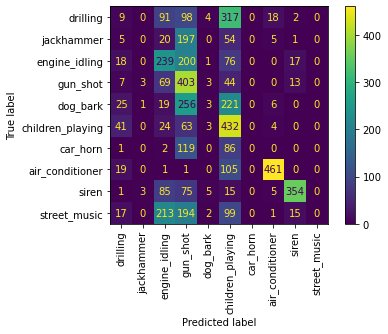

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    grid, X_train, y_train, display_labels=y_train.unique(), xticks_rotation="vertical"
)

In [ ]:
bb

In [94]:
metrics = ['euclidean', 'minkowski']

k_neighboors = [1,3,5,7,11,int(np.sqrt(len(df)))]
for i in range(0,5):
    rand = 1
    while rand in k_neighboors:
        rand = np.random.randint(11,50)
    k_neighboors.append(rand)
print(k_neighboors)

[1, 3, 5, 7, 11, 73, 21, 41, 28, 31, 26]


In [109]:
rgrid_params_knn = [{
        'cls__metric' : ['euclidean', 'minkowski'],
        'cls__n_neighbors' : k_neighboors,
        }]

In [110]:
pipe_knn = Pipeline(steps=[('scaler',StandardScaler()),('cls', KNeighborsClassifier())]) 

In [111]:
knn_rgrid = RandomizedSearchCV(pipe_knn,cv=10, param_distributions=rgrid_params_knn,scoring='f1_micro', n_jobs=4)

In [103]:
knn_rgrid.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('cls', KNeighborsClassifier())],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__cls': KNeighborsClassifier(),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__cls__algorithm': 'auto',
 'estimator__cls__leaf_size': 30,
 'estimator__cls__metric': 'minkowski',
 'estimator__cls__metric_params': None,
 'estimator__cls__n_jobs': None,
 'estimator__cls__n_neighbors': 5,
 'estimator__cls__p': 2,
 'estimator__cls__weights': 'uniform',
 'estimator': Pipeline(steps=[('scaler', StandardScaler()), ('cls', KNeighborsClassifier())]),
 'n_iter': 10,
 'n_jobs': 4,
 'param_distributions': [{'cls__metrics': ['euclidean', 'minkowski'],
   'cls__k_neighboors': [1, 3, 5, 7, 11, 73, 21, 41, 28, 31, 26]}],
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'refit': True,
 'return_train

In [113]:
knn_rgrid.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('cls', KNeighborsClassifier())]),
                   n_jobs=4,
                   param_distributions=[{'cls__metric': ['euclidean',
                                                         'minkowski'],
                                         'cls__n_neighbors': [1, 3, 5, 7, 11,
                                                              73, 21, 41, 28,
                                                              31, 26]}],
                   scoring='f1_micro')

In [114]:
knn_rgrid.best_score_

0.9290538792203998

In [ ]:
scaler.fit(X)
X_norm = pd.DataFrame(scaler.transform(X),columns=X.columns)

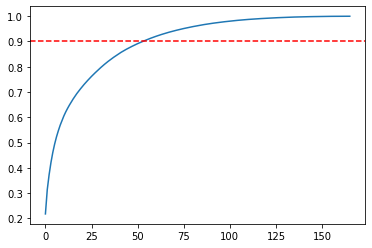

In [ ]:
pca = PCA()
pca.fit(X_norm)
X_pca = pd.DataFrame(pca.transform(X_norm))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y = 0.9, color = 'r', linestyle = '--')
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
X_pca_2 = X_pca[[0,1]]
X_pca_2.columns=['pca1','pca2']
df_pca_2 = pd.concat([X_pca_2,y],axis=1,ignore_index=True)
df_pca_2.columns = ['PCA_1','PCA_2','Y']

# PCA plotting

<AxesSubplot:xlabel='PCA_1', ylabel='Count'>

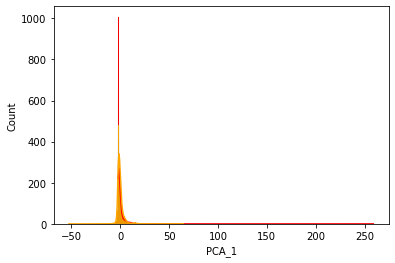

In [ ]:
fig = plt.figure()
sns.histplot(df_pca_2['PCA_1'],kde=True,color='red',alpha=1);
sns.histplot(df_pca_2['PCA_2'],kde=True,color='orange',alpha=1);

<AxesSubplot:xlabel='PCA_1', ylabel='Count'>

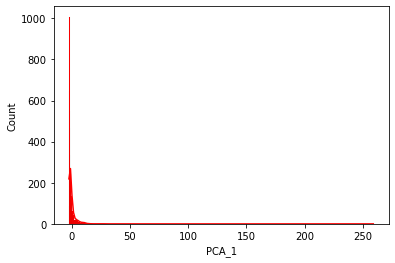

In [ ]:
sns.histplot(df_pca_2['PCA_1'],kde=True,color='red',alpha=1)

In [ ]:
X_pca_2.max()

pca1    258.956379
pca2     64.430316
dtype: float64

In [ ]:
X_pca_2.median()

pca1   -1.369941
pca2   -0.828539
dtype: float64

In [ ]:
df_pca_2

,PCA_1,PCA_2,Y
0,-0.487032,-0.879139,siren
1,6.563725,5.180704,street_music
2,4.114528,-3.249554,drilling
3,2.226623,10.086954,siren
4,0.755135,3.715467,dog_bark
...,...,...,...
5430,-1.569709,-0.241676,engine_idling
5431,-1.723540,-0.580667,dog_bark
5432,-1.867440,-2.196318,engine_idling
5433,-1.953833,-2.054118,engine_idling


In [ ]:
sns.kdeplot(
    data=df_pca_2, x="PCA_1", y="PCA_2", hue="Y",
    levels=5, thresh=.2,
)

In [ ]:
df_pca_2['PCA_1']

0      -0.487032
1       6.563725
2       4.114528
3       2.226623
4       0.755135
          ...   
5430   -1.569709
5431   -1.723540
5432   -1.867440
5433   -1.953833
5434   -1.930563
Name: PCA_1, Length: 5435, dtype: float64

<AxesSubplot:xlabel='PCA_1', ylabel='Count'>

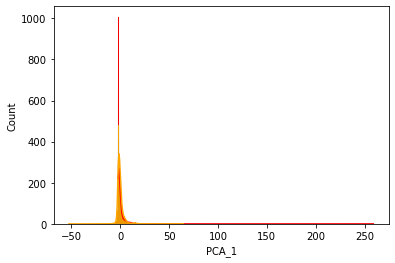

In [ ]:
fig = plt.figure()
sns.histplot(df_pca_2['PCA_1'],kde=True,color='red',alpha=1)
sns.histplot(df_pca_2['PCA_2'],kde=True,color='orange',alpha=1)

In [ ]:
df_pca_2_clean = df_pca_2[df_pca_2['PCA_1']< 30]

In [ ]:
df_pca_2_clean.groupby(by='Y').count()['PCA_1'] / grouped_counter

Y
air_conditioner     1.000000
car_horn            0.996732
children_playing    1.000000
dog_bark            0.991667
drilling            0.988333
engine_idling       1.000000
gun_shot            0.991304
jackhammer          1.000000
siren               1.000000
street_music        1.000000
dtype: float64

<AxesSubplot:xlabel='PCA_1', ylabel='Count'>

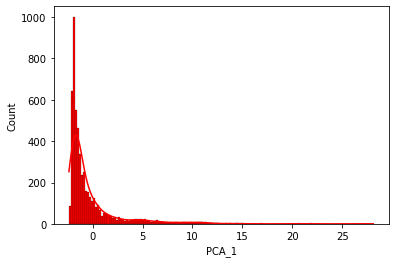

In [ ]:
sns.histplot(df_pca_2_clean['PCA_1'],kde=True,color='red',alpha=1)

In [ ]:
df_pca_2_clean_2 = df_pca_2[df_pca_2['PCA_1']< 15]

In [ ]:
df_pca_2_clean_2.groupby(by='Y').count()['PCA_1'] / grouped_counter

Y
air_conditioner     1.000000
car_horn            0.996732
children_playing    0.998333
dog_bark            0.973333
drilling            0.961667
engine_idling       0.996795
gun_shot            0.986957
jackhammer          0.998503
siren               1.000000
street_music        0.998333
dtype: float64

In [ ]:
df_pca_2_clean_2.groupby(by='Y').count()['PCA_1'].sum()/grouped_counter.sum()

0.9911683532658694

<AxesSubplot:xlabel='PCA_1', ylabel='Count'>

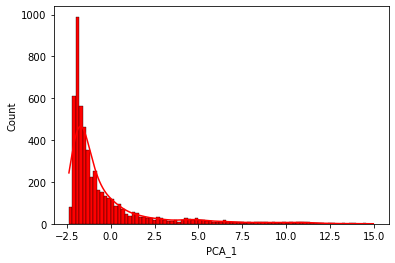

In [ ]:
sns.histplot(df_pca_2_clean_2['PCA_1'],kde=True,color='red',alpha=1)

<AxesSubplot:xlabel='PCA_2', ylabel='Count'>

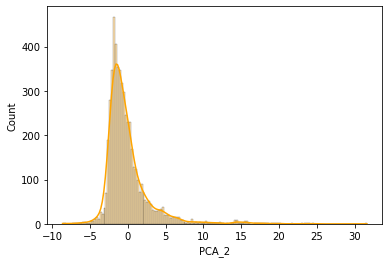

In [ ]:
sns.histplot(df_pca_2_clean_2['PCA_2'],kde=True,color='orange',alpha=0.3)

/home/nikola/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


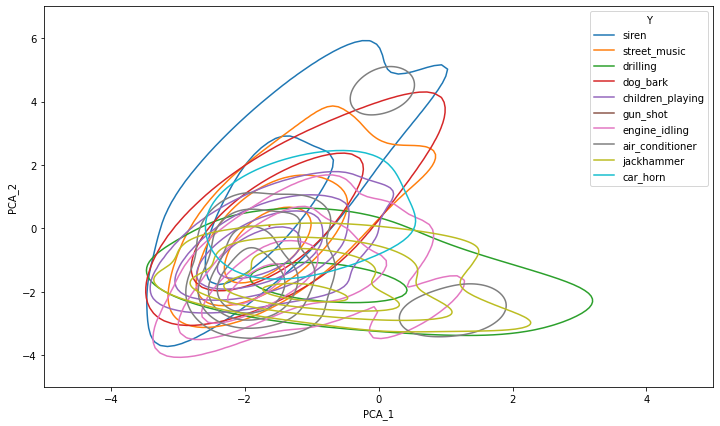

In [ ]:
fig = plt.figure(figsize=(12,7))
g = sns.kdeplot(
    data=df_pca_2_clean_2, x="PCA_1", y="PCA_2", hue="Y",
    levels=5, thresh=.2
);
g.set(xlim=(-5, 5));
g.set(ylim=(-5, 7));

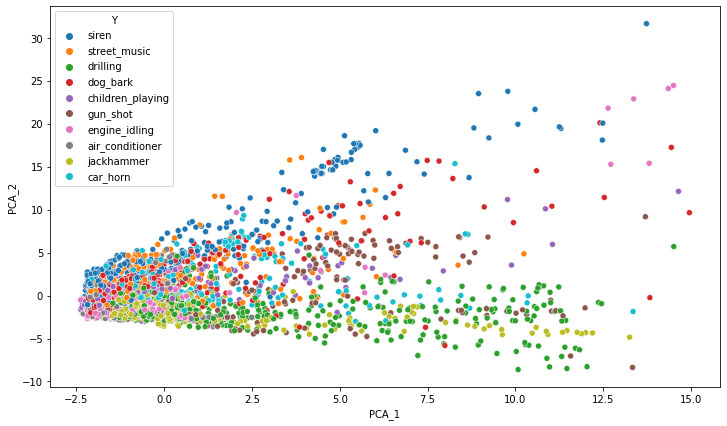

In [ ]:
fig = plt.figure(figsize=(12,7))
g = sns.scatterplot(
    data=df_pca_2_clean_2, x="PCA_1", y="PCA_2", hue="Y",
    #levels=5, thresh=.2
);

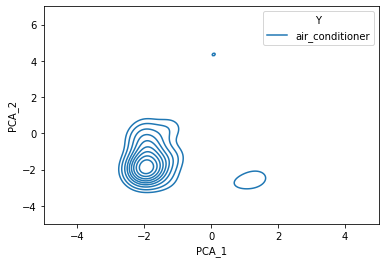

In [ ]:
g = sns.kdeplot(
    data=df_pca_2_clean_2[df_pca_2_clean_2['Y']=='air_conditioner'], x="PCA_1", y="PCA_2", hue="Y",n_levels=10,
    levels=5, thresh=.2
);
g.set(xlim=(-5, 5));
g.set(ylim=(-5, 7));

In [ ]:
pipe = make_pipeline(steps=['standardscaler',])